In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Load data

In [26]:
from DataLoader import HeartFailureDataset

load_data = HeartFailureDataset()
X = load_data.get_features()
y = load_data.get_targets()
X.shape

(299, 12)

In [27]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


We need to scale our data. Without scaling the data, the nerual network does not work! The gradients are too small!

In [28]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,0.000166,0,20,1,1.681648e-02,0.490057,-1.504036,1,0,4
1,55.0,0,7.514640,0,38,0,7.535660e-09,-0.284552,-0.141976,1,0,6
2,65.0,0,-0.449939,0,20,0,-1.038073e+00,-0.090900,-1.731046,1,1,7
3,50.0,1,-0.486071,0,20,0,-5.464741e-01,0.490057,0.085034,1,0,7
4,65.0,1,-0.435486,1,20,0,6.517986e-01,1.264666,-4.682176,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,-0.537688,1,38,1,-1.109765e+00,-0.284552,1.447094,1,1,270
295,55.0,0,1.278215,0,38,0,6.802472e-02,-0.187726,0.539054,0,0,271
296,45.0,0,1.525979,1,60,0,4.902082e+00,-0.575031,0.312044,0,0,278
297,45.0,0,1.890398,0,38,0,-1.263389e+00,0.005926,0.766064,1,1,280


### **Set up Logistic Regression model**
We want to set up our logistic regression by using a neural network. We will use one Linear Layer and the sigmoid function to transform our data in a range between 0 and 1.

In [29]:
class LogisticRegression(nn.Module): 
    def __init__(self, input_dimensions):
        super().__init__()
        self.linear = nn.Linear(in_features = input_dimensions, out_features = 1)

    def forward(self,x): # Define forard function which applies sigmoid function to our output 
        return torch.sigmoid(self.linear(x))

In [30]:
LR_model = LogisticRegression(input_dimensions=X.shape[1])

So far, we will use the *binary cross-entropy-loss* (**BCELoss**). Later on, one can try different other loss functions.  
For a standard Logistic Regression without any regularization, we can use *Gradient Descent* as an optimization tool.

In [31]:
loss_fun = nn.BCELoss() 
learning_rate = 0.0001
optimizer = optim.SGD(LR_model.parameters(), lr=learning_rate)

### **Training step**

In [32]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

In [33]:
epochs = 500
plot_gradients = False

# We wish to save the trajectory of weight, bias and loss
hist_W = []
hist_b = []
hist_loss = []

#Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
for epoch in range(epochs):
    pred = LR_model(X_tensor)                       # Forward pass
    loss = loss_fun(pred, Y_tensor)                 # Compute loss

    optimizer.zero_grad()   # Gradienten auf Null setzen
    loss.backward()         # Berechne den Gradienten
    optimizer.step()        # Optimierungsschritt nach Gradient Descent 

    hist_loss.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")
        if plot_gradients:
            for name, param in LR_model.named_parameters():
                if param.grad is not None:
                    print(f"Gradient of {name} : {param.grad}")

    


Epoch 0: Loss = 66.4619
Epoch 50: Loss = 66.4586
Epoch 100: Loss = 66.4524
Epoch 150: Loss = 66.4448
Epoch 200: Loss = 66.4391
Epoch 250: Loss = 66.4317
Epoch 300: Loss = 66.4253
Epoch 350: Loss = 66.1364
Epoch 400: Loss = 66.1256
Epoch 450: Loss = 66.1157


Visualize loss function for the training iterations. Test this one for different learning rates.

In [34]:
for name, param in LR_model.named_parameters():
    print(f"Parameter: {name}")
    print(param.data)  

Parameter: linear.weight
tensor([[ 0.0881,  0.2113,  0.1398, -0.1975,  0.0563, -0.2611, -0.1494, -0.1676,
          0.1964,  0.0673,  0.2779,  0.1666]])
Parameter: linear.bias
tensor([-0.0885])


## **Test different learning rates**

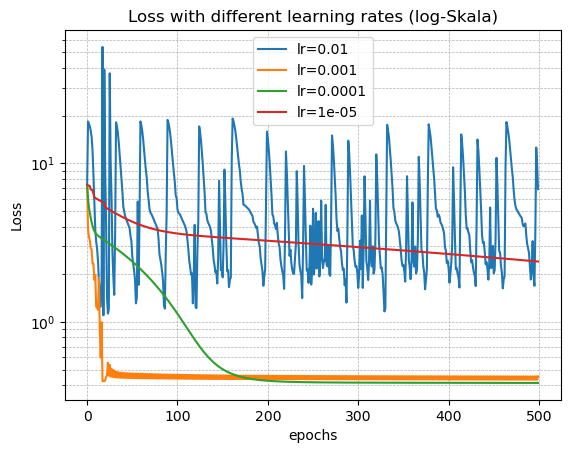

In [35]:
lr = [0.01, 0.001, 0.0001, 0.00001]
losses = []

for learning_rate in lr:
    torch.manual_seed(41)
    LR_model = LogisticRegression(input_dimensions=X.shape[1])

    loss_fun = nn.BCELoss() 
    optimizer = optim.SGD(LR_model.parameters(), lr=learning_rate)

    X_tensor = torch.tensor(X.values, dtype=torch.float32)
    Y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    epochs = 500

    # We wish to save the trajectory of weight, bias and loss
    hist_W = []
    hist_b = []
    hist_loss = []

    #Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
    for epoch in range(epochs):
        pred = LR_model(X_tensor)                       # Forward pass
        loss = loss_fun(pred, Y_tensor)                 # Compute loss

        optimizer.zero_grad()   # Gradienten auf Null setzen
        loss.backward()         # Berechne den Gradienten
        optimizer.step()        # Optimierungsschritt nach Gradient Descent 

        hist_loss.append(loss.item())
    
    losses.append(hist_loss)

for hist_loss in losses:
    plt.plot(hist_loss)

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.yscale("log")  # <-- log-Skalierung der y-Achse
plt.legend([f"lr={l}" for l in lr])
plt.title("Loss with different learning rates (log-Skala)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

Choose **lr = 0.0001** as the learning rate.

## **Cross-Validation**
First, we build up a complete model, including a fit() and pred() function.

In [56]:
class LR_complete(nn.Module): 
    def __init__(self, input_dimensions):
        super().__init__()
        self.linear = nn.Linear(in_features = input_dimensions, out_features = 1)

    def forward(self,x): # Define forard function which applies sigmoid function to our output 
        return torch.sigmoid(self.linear(x))

    def fit(self, X_train, y_train, epochs=500, learning_rate = 0.0001):
        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

        loss_fun = nn.BCELoss() 
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)
        
        for epoch in range(epochs):
            pred = self.forward(X_train_tensor)
            loss = loss_fun(pred, y_train_tensor)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        self.final_weights = self.linear.weight.data
        self.final_bias = self.linear.bias.data
        self.final_loss = loss.item()
    
    def pred(self, X):
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        return self.forward(X_tensor)


In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []

all_y_true = []
all_y_pred = []

# Cross-Validation Schleife
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold = X.iloc[train_index]
    y_train_fold = y.iloc[train_index]
    X_val_fold = X.iloc[val_index]
    y_val_fold = y.iloc[val_index]

    model = LR_complete(input_dimensions = X_train_fold.shape[1])

    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.pred(X_val_fold)

    y_pred_fold = y_pred_fold.detach().numpy()

    y_pred_fold_classes = (y_pred_fold >= 0.5).astype(int)

    acc = accuracy_score(y_val_fold, y_pred_fold_classes)
    accuracies.append(acc)
    
    print(f"Accuracy Fold {fold + 1}: {acc:.4f}")

    all_y_true.extend(y_val_fold.to_numpy())
    all_y_pred.extend(y_pred_fold_classes)


print(f"\nDurchschnittliche Accuracy: {np.mean(accuracies):.4f}")

cm = confusion_matrix(all_y_true, all_y_pred)

print(cm)


Accuracy Fold 1: 0.8333
Accuracy Fold 2: 0.5333
Accuracy Fold 3: 0.4000
Accuracy Fold 4: 0.8667
Accuracy Fold 5: 0.9000
Accuracy Fold 6: 0.9000
Accuracy Fold 7: 0.9333
Accuracy Fold 8: 0.8333
Accuracy Fold 9: 0.8333
Accuracy Fold 10: 0.8276

Durchschnittliche Accuracy: 0.7861
[[167  36]
 [ 28  68]]


**Next: Try L1 and L2-Regularization and see if we can obtain better accuracy**